In [1]:
#Importin required libraries
import pandas as pd
import json

with open('transactions.txt', 'r') as file:
    data = file.readlines()

data = [json.loads(d) for d in data]
df = pd.DataFrame(data)

In [2]:
df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
5,830329091,830329091,5000.0,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,02,...,,0.00,,,,True,,,False,False
6,830329091,830329091,5000.0,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,02,...,,0.00,,,,True,,,False,False
7,830329091,830329091,5000.0,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,05,...,,0.00,,,,True,,,False,False
8,830329091,830329091,5000.0,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,,US,02,...,,9.37,,,,True,,,False,False
9,830329091,830329091,5000.0,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,05,...,,0.00,,,,True,,,False,False


In [3]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [4]:
df.dtypes

accountNumber                object
customerId                   object
creditLimit                 float64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                      object
enteredCVV                   object
cardLast4Digits              object
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

In [5]:
#Checking for null values
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [6]:
#Dropping the columns with least probable impact on the classification target
df.drop(['echoBuffer', 'merchantCity' , 'merchantState' , 'merchantZip' , 'posOnPremises' , 'recurringAuthInd','merchantName', 'acqCountry' , 'merchantCountryCode' , 'posConditionCode' , 'merchantCategoryCode'] , axis = 1 , inplace=True)

In [7]:
df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,posEntryMode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,02,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,09,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,09,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,09,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,02,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
5,830329091,830329091,5000.0,5000.00,2016-04-19T16:24:27,30.76,02,01/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
6,830329091,830329091,5000.0,5000.00,2016-05-21T14:50:35,57.28,02,05/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
7,830329091,830329091,5000.0,5000.00,2016-06-03T00:31:21,9.37,05,01/2021,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
8,830329091,830329091,5000.0,4990.63,2016-06-10T01:21:46,523.67,02,08/2032,2015-08-06,2015-08-06,885,885,3143,PURCHASE,9.37,True,False,False
9,830329091,830329091,5000.0,5000.00,2016-07-11T10:47:16,164.37,05,04/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False


In [8]:
#Converting datatype from object to int
df['accountNumber'] = df['accountNumber'].astype(str).astype(int)
df['customerId'] = df['customerId'].astype(str).astype(int)
df['cardCVV'] = df['cardCVV'].astype(str).astype(int)
df['enteredCVV'] = df['enteredCVV'].astype(str).astype(int)
df['cardLast4Digits'] = df['cardLast4Digits'].astype(str).astype(int)

In [9]:
#Replacing unwanted character
df["transactionDateTime"]= df["transactionDateTime"].str.replace('T' , " ")

In [10]:
#Converting to dateTime format
df['transactionDateTime'] =  pd.to_datetime(df['transactionDateTime'])
df['transactionDateTime'] 

0        2016-08-13 14:27:32
1        2016-10-11 05:05:54
2        2016-11-08 09:18:39
3        2016-12-10 02:14:50
4        2016-03-24 21:04:46
                 ...        
786358   2016-12-22 18:44:12
786359   2016-12-25 16:20:34
786360   2016-12-27 15:46:24
786361   2016-12-29 00:30:55
786362   2016-12-30 20:10:29
Name: transactionDateTime, Length: 786363, dtype: datetime64[ns]

In [11]:
#Converting to dateTime format
df['currentExpDate'] =  pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] =  pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] =  pd.to_datetime(df['dateOfLastAddressChange'])

In [12]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,posEntryMode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13 14:27:32,98.55,02,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11 05:05:54,74.51,09,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08 09:18:39,7.47,09,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10 02:14:50,7.47,09,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24 21:04:46,71.18,02,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22 18:44:12,119.92,90,2022-12-01,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25 16:20:34,18.89,09,2023-08-01,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27 15:46:24,49.43,02,2025-08-01,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29 00:30:55,49.89,09,2022-07-01,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 18 columns):
accountNumber               786363 non-null int32
customerId                  786363 non-null int32
creditLimit                 786363 non-null float64
availableMoney              786363 non-null float64
transactionDateTime         786363 non-null datetime64[ns]
transactionAmount           786363 non-null float64
posEntryMode                786363 non-null object
currentExpDate              786363 non-null datetime64[ns]
accountOpenDate             786363 non-null datetime64[ns]
dateOfLastAddressChange     786363 non-null datetime64[ns]
cardCVV                     786363 non-null int32
enteredCVV                  786363 non-null int32
cardLast4Digits             786363 non-null int32
transactionType             786363 non-null object
currentBalance              786363 non-null float64
cardPresent                 786363 non-null bool
expirationDateKeyInMatch    786363 non-null 

In [15]:
#Dropping unnecessary columns
df.drop(['posEntryMode' , 'transactionType'] , axis = 1 , inplace=True)

In [16]:
#Dealing with boolean values
df['cardPresent'] = df['cardPresent'].astype(int)
df['expirationDateKeyInMatch']  = df['expirationDateKeyInMatch'].astype(int)
df['isFraud'] =df['isFraud'].astype(int)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 16 columns):
accountNumber               786363 non-null int32
customerId                  786363 non-null int32
creditLimit                 786363 non-null float64
availableMoney              786363 non-null float64
transactionDateTime         786363 non-null datetime64[ns]
transactionAmount           786363 non-null float64
currentExpDate              786363 non-null datetime64[ns]
accountOpenDate             786363 non-null datetime64[ns]
dateOfLastAddressChange     786363 non-null datetime64[ns]
cardCVV                     786363 non-null int32
enteredCVV                  786363 non-null int32
cardLast4Digits             786363 non-null int32
currentBalance              786363 non-null float64
cardPresent                 786363 non-null int32
expirationDateKeyInMatch    786363 non-null int32
isFraud                     786363 non-null int32
dtypes: datetime64[ns](4), float64(4), int32(

In [18]:
import datetime as dt
df['transactionDateTime']=df['transactionDateTime'].map(dt.datetime.toordinal)

In [19]:
#Converting dateTime toordinal for mutual_info_classif
df['currentExpDate']=df['currentExpDate'].map(dt.datetime.toordinal)

In [20]:
#Converting dateTime toordinal for mutual_info_classif
df['accountOpenDate']=df['accountOpenDate'].map(dt.datetime.toordinal)

In [21]:
#Converting dateTime toordinal for mutual_info_classif
df['dateOfLastAddressChange']=df['dateOfLastAddressChange'].map(dt.datetime.toordinal)

In [22]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop(labels = ['isFraud'] , axis = 1) , df['isFraud'] , 
                                                      test_size = 0.3 , random_state = 0)

In [23]:
x_train.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch
447188,383285381,383285381,5000.0,4993.63,736184,117.02,740163,735606,735606,250,250,5680,6.37,1,0
706288,960197435,960197435,2500.0,1978.56,736238,193.03,737822,735444,736161,163,163,3380,521.44,0,0
457495,558892780,558892780,7500.0,1320.68,736288,328.74,739921,734586,736254,101,101,8494,6179.32,0,0
784029,473474510,473474510,10000.0,9114.29,735999,376.95,741839,734894,734894,496,496,2472,885.71,1,0
188036,640232605,640232605,2500.0,790.86,736000,53.11,741839,734862,734862,861,861,2565,1709.14,1,0


In [24]:
#Identifying most useful features for prediction
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x_train , y_train)
mutual_info

array([7.41791765e-03, 7.09623690e-03, 1.42892358e-02, 2.39064310e-04,
       2.28729360e-04, 3.30270270e-03, 6.12097504e-04, 5.44419945e-03,
       3.60057512e-03, 4.27567868e-03, 4.34356324e-03, 6.47677071e-03,
       2.31838119e-04, 2.76325947e-02, 3.56919524e-06])

In [25]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending = False)

cardPresent                 0.027633
creditLimit                 0.014289
accountNumber               0.007418
customerId                  0.007096
cardLast4Digits             0.006477
accountOpenDate             0.005444
enteredCVV                  0.004344
cardCVV                     0.004276
dateOfLastAddressChange     0.003601
transactionAmount           0.003303
currentExpDate              0.000612
availableMoney              0.000239
currentBalance              0.000232
transactionDateTime         0.000229
expirationDateKeyInMatch    0.000004
dtype: float64

<AxesSubplot:>

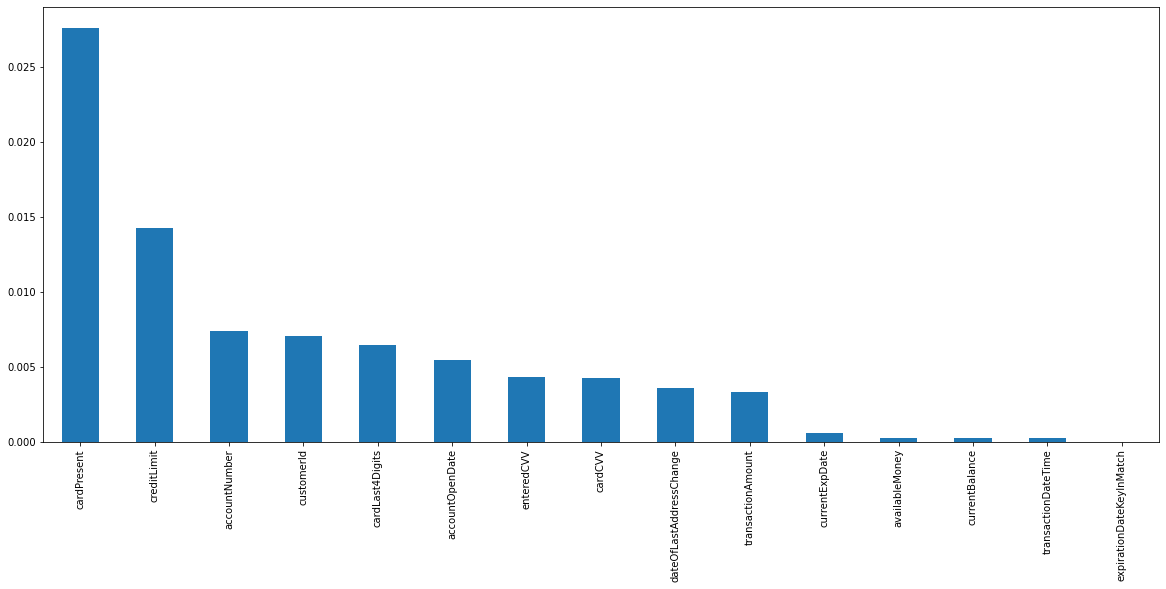

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
mutual_info.sort_values(ascending = False).plot.bar(figsize = (20 , 8))

In [27]:
from sklearn.feature_selection import SelectKBest

In [28]:
sel_nine_cols = SelectKBest(mutual_info_classif , k = 9)
sel_nine_cols.fit(x_train , y_train)
x_train.columns[sel_nine_cols.get_support()]

Index(['accountNumber', 'customerId', 'creditLimit', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'cardPresent'],
      dtype='object')

In [29]:
#Training the model
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(x_train , y_train)

RandomForestClassifier(max_features='sqrt')

In [30]:
model.score(x_test , y_test)

0.9845364102259769

In [31]:
y_predicted = model.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_predicted)
cm

array([[232207,     34],
       [  3614,     54]], dtype=int64)

Text(69.0, 0.5, 'Truth')

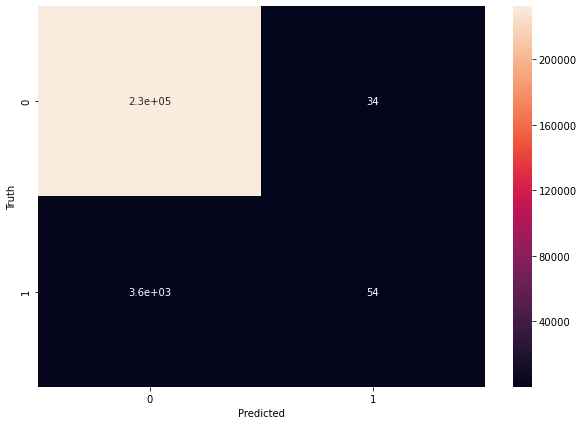

In [33]:
import seaborn as sns
plt.figure(figsize=(10 , 7))
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
#checking for overfitting
pred_train = model.predict(x_train)
pred = model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score , precision_score , recall_score
print("Accuracy score on test data" , accuracy_score(y_test , pred))
print("Accuracy score on training data" , accuracy_score(y_train , pred_train))


Accuracy score on test data 0.9845364102259769
Accuracy score on training data 0.9999727497665564


Hence the model is not overfit and gives good accuracy score for classifying a transaction as fraudulent or not